In [93]:
import pandas as pd
import numpy as np
import os

In [3]:
data_info_path = '/workspace/BoneMeta_raw/data_info.csv'

In [4]:
data_info = pd.read_csv(data_info_path)

In [92]:
data_info.head()

,Case,Lesion Type,Lesion Location,I/V,File Name,Lesion Size,Background Size,Original Shape,1mm Resized Shape,1 Resized Shape,Original Center,1mm Resized Center,1 Resized Center
0,000002_20180829_chest,M,T10,I,lesionAnnot3D-004,3449.0,104854151.0,"[512, 512, 400]","[377, 377, 400]","(512, 512, 543)","[256, 322, 266]","[188, 237, 266]","[256, 322, 361]"
1,000005_20181202_abdomen,L,L5,V,lesionAnnot3D-001,34062.0,37976818.0,"[512, 512, 145]","[323, 323, 435]","(512, 512, 230)","[298, 298, 92]","[188, 188, 276]","[298, 298, 146]"
2,000009_20180417_chest,S,C7-1,V,lesionAnnot3D-001,2299.0,89126661.0,"[512, 512, 340]","[378, 378, 340]","(512, 512, 461)","[263, 308, 8]","[194, 227, 8]","[263, 308, 11]"
3,000009_20180417_chest,S,C7-2,I,lesionAnnot3D-002,872.0,89128088.0,"[512, 512, 340]","[378, 378, 340]","(512, 512, 461)","[278, 290, 19]","[205, 214, 19]","[278, 290, 26]"
4,000009_20180417_chest,S,T1-2,I,lesionAnnot3D-004,1242.0,89127718.0,"[512, 512, 340]","[378, 378, 340]","(512, 512, 461)","[285, 297, 39]","[210, 219, 39]","[285, 297, 53]"


In [96]:
print(
f'''
data shape = {data_info.shape}, 
Unique case number = {data_info.Case.unique().size}
Cases per lesion type 
 S : {data_info.loc[data_info['Lesion Type']=='S'].Case.unique().size}
 L : {data_info.loc[data_info['Lesion Type']=='L'].Case.unique().size}
 M : {data_info.loc[data_info['Lesion Type']=='M'].Case.unique().size}

I/V ratio = {data_info.loc[data_info['I/V']=='I'].shape[0]} / {data_info.loc[data_info['I/V']=='V'].shape[0]}

Lesion info 
{data_info['Lesion Size'].describe()}

Different case names: 
  Folder - CSV = {set(os.listdir('/workspace/BoneMeta_raw/data')) - set(data_info.Case.unique())}
  CSV - Folder = {set(data_info.Case.unique()) - set(os.listdir('/workspace/BoneMeta_raw/data'))}
'''
)



data shape = (3175, 13), 
Unique case number = 309
Cases per lesion type 
 S : 228
 L : 169
 M : 119

I/V ratio = 879 / 2296

Lesion info 
count      3175.000000
mean      13860.211969
std       46153.566477
min           8.000000
25%         581.500000
50%        2324.000000
75%        9686.500000
max      997965.000000
Name: Lesion Size, dtype: float64

Different case names: 
  Folder - CSV = {'SN040_20170201_CT Neck (contrast)'}
  CSV - Folder = set()



In [85]:
def show_hist(data_info, ax, type="All", log=False, n_bin = 30, title=''):
    if ax is None:
        ax = plt.gca()
    if log:
        if type == 'All':
            ax.hist(data_info['Lesion Size'].apply(np.log), bins = n_bin, density=True)
        else:
            ax.hist(data_info.loc[data_info['Lesion Type']==type]['Lesion Size'].apply(np.log), bins = n_bin, density=True)
    else:
        if type == 'All':
            ax.hist(data_info['Lesion Size'], bins = n_bin, density=True)
        else:
            ax.hist(data_info.loc[data_info['Lesion Type']==type]['Lesion Size'], bins = n_bin, density=True)
    
    ax.set_title(label = title)
    return ax

In [82]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'log All size'}>

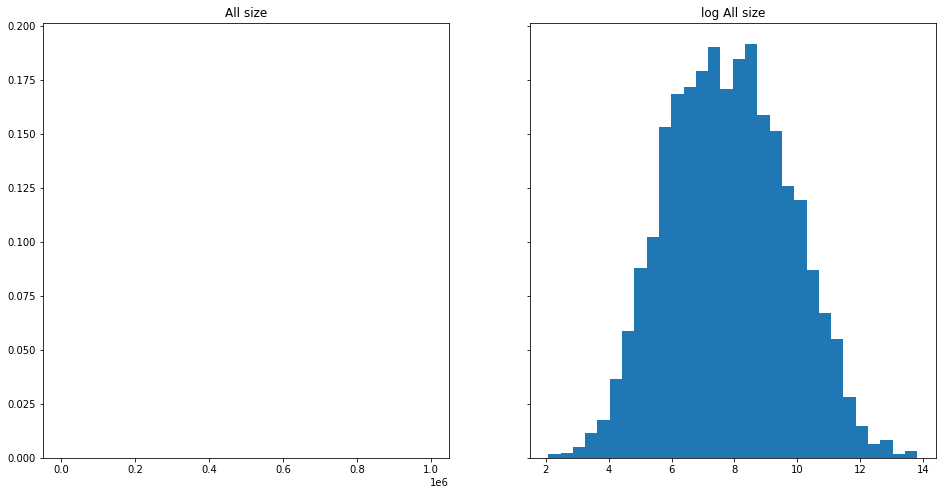

In [88]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8), sharey= True)
show_hist(data_info, axes[0], title='All size')
show_hist(data_info, axes[1], title='log All size', log=True)

<AxesSubplot:title={'center':'S size'}>

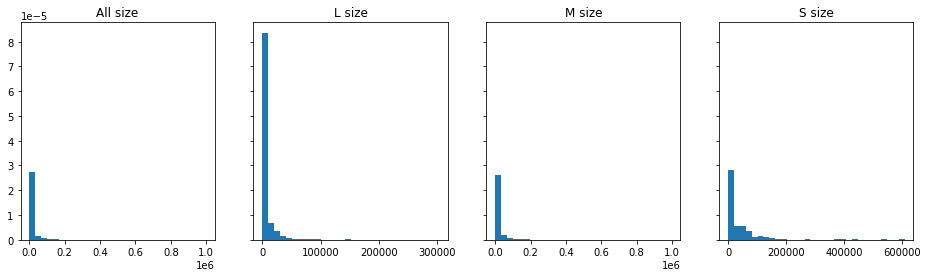

In [90]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(16,4), sharey= True)
show_hist(data_info, axes[0], title='All size')
show_hist(data_info, axes[1], type='S', title='L size')
show_hist(data_info, axes[2], type='L', title='M size')
show_hist(data_info, axes[3], type='M', title='S size')

<AxesSubplot:title={'center':'log M size'}>

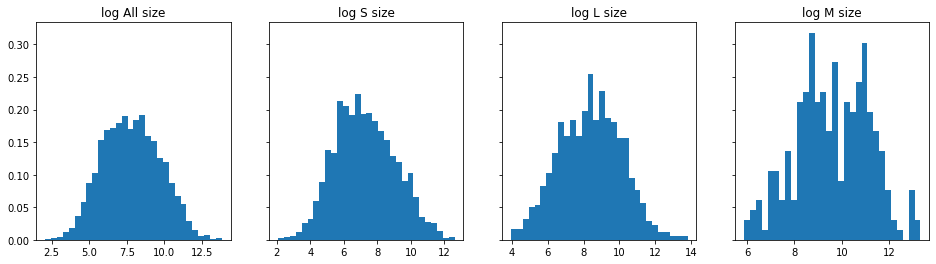

In [91]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(16,4), sharey= True)
show_hist(data_info, axes[0], title='log All size', log=True)
show_hist(data_info, axes[1], type='S', title='log S size', log=True)
show_hist(data_info, axes[2], type='L', title='log L size', log=True)
show_hist(data_info, axes[3], type='M', title='log M size', log=True)

<AxesSubplot:title={'center':'log M size'}>

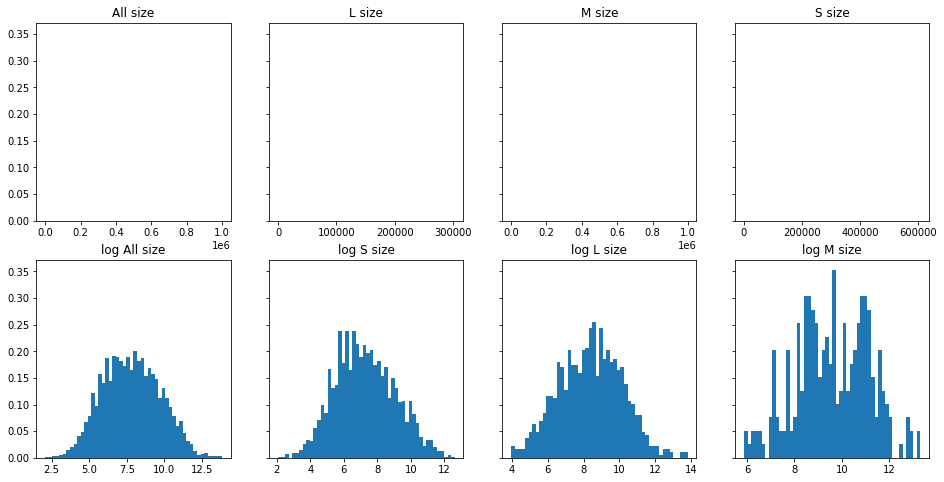

In [80]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16,8), sharey= True)
show_hist(data_info, axes[0, 0], title='All size')
show_hist(data_info, axes[0, 1], type='S', title='L size')
show_hist(data_info, axes[0, 2], type='L', title='M size')
show_hist(data_info, axes[0, 3], type='M', title='S size')
show_hist(data_info, axes[1, 0], title='log All size', log=True)
show_hist(data_info, axes[1, 1], type='S', title='log S size', log=True)
show_hist(data_info, axes[1, 2], type='L', title='log L size', log=True)
show_hist(data_info, axes[1, 3], type='M', title='log M size', log=True)